In [6]:
import numpy as np
import pandas as pd
filepath = 'data/titanic3.xls'
all_df = pd.read_excel(filepath)

In [13]:
all_df[:10]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [12]:
all_df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [14]:
cols = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']
selected_df = all_df[cols]

In [16]:
selected_df.isnull().sum()

survived      0
pclass        0
sex           0
age         263
sibsp         0
parch         0
embarked      2
dtype: int64

In [17]:
selected_df['age'] = selected_df['age'].fillna(selected_df['age'].mean())

//anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
selected_df['embarked'] = selected_df['embarked'].fillna('S')

//anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
selected_df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    0
dtype: int64

In [26]:
selected_df['sex'] = selected_df['sex'].map({'female':0, 'male':1}).astype(int)

ValueError: Cannot convert NA to integer

In [27]:
selected_df = pd.get_dummies(data=selected_df, columns=['embarked'])

In [28]:
selected_df[:10]

,survived,pclass,sex,age,sibsp,parch,embarked_C,embarked_Q,embarked_S
0,1,1,0,29.0000,0,0,0,0,1
1,1,1,1,0.9167,1,2,0,0,1
2,0,1,0,2.0000,1,2,0,0,1
3,0,1,1,30.0000,1,2,0,0,1
4,0,1,0,25.0000,1,2,0,0,1
5,1,1,1,48.0000,0,0,0,0,1
6,1,1,0,63.0000,1,0,0,0,1
7,0,1,1,39.0000,0,0,0,0,1
8,1,1,0,53.0000,2,0,0,0,1
9,0,1,1,71.0000,0,0,1,0,0


In [45]:
msk = np.random.rand(len(selected_df)) < 0.8
train_df = selected_df[msk]
test_df = selected_df[~msk]

In [48]:
print('Total: '+ str(len(selected_df)))
print('Train: '+ str(len(train_df)))
print('Test : '+ str(len(test_df)))

Total: 1309
Train: 1041
Test : 268


In [55]:
train_labels = train_df.values[:,0]
train_features = train_df.values[:,1:]
test_labels = test_df.values[:,0]
test_features = test_df.values[:,1:]

In [125]:
from sklearn import preprocessing

In [146]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(-1, 1))
train_features = minmax_scale.fit_transform(train_features)
test_features = minmax_scale.fit_transform(test_features)

In [147]:
train_features.shape

(1041, 8)

In [148]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [149]:
model = Sequential()
model.add(Dense(units=100, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=50, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform', activation='relu'))

In [150]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 100)               900       
_________________________________________________________________
dropout_18 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_19 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 51        
Total params: 6,001
Trainable params: 6,001
Non-trainable params: 0
_________________________________________________________________


In [151]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [152]:
train_history = model.fit(x=train_features, y=train_labels, validation_split=0.15, epochs=100, batch_size=100, verbose=2)

Train on 884 samples, validate on 157 samples
Epoch 1/100
0s - loss: 1.6591 - acc: 0.5769 - val_loss: 0.5988 - val_acc: 0.8089
Epoch 2/100
0s - loss: 1.0781 - acc: 0.5769 - val_loss: 0.4960 - val_acc: 0.8089
Epoch 3/100
0s - loss: 0.8202 - acc: 0.5769 - val_loss: 0.4767 - val_acc: 0.8089
Epoch 4/100
0s - loss: 0.6856 - acc: 0.5871 - val_loss: 0.5012 - val_acc: 0.8089
Epoch 5/100
0s - loss: 0.6149 - acc: 0.6799 - val_loss: 0.5223 - val_acc: 0.8025
Epoch 6/100
0s - loss: 0.5917 - acc: 0.6957 - val_loss: 0.4928 - val_acc: 0.8025
Epoch 7/100
0s - loss: 0.5569 - acc: 0.7138 - val_loss: 0.4601 - val_acc: 0.8153
Epoch 8/100
0s - loss: 0.5362 - acc: 0.7421 - val_loss: 0.4433 - val_acc: 0.8089
Epoch 9/100
0s - loss: 0.5269 - acc: 0.7500 - val_loss: 0.4373 - val_acc: 0.7962
Epoch 10/100
0s - loss: 0.5205 - acc: 0.7692 - val_loss: 0.4373 - val_acc: 0.7771
Epoch 11/100
0s - loss: 0.5325 - acc: 0.7398 - val_loss: 0.4254 - val_acc: 0.8025
Epoch 12/100
0s - loss: 0.5374 - acc: 0.7613 - val_loss: 0.42

In [153]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

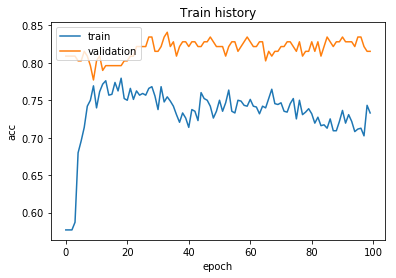

In [154]:
show_train_history(train_history, 'acc', 'val_acc')

In [155]:
scores = model.evaluate(x=test_features, y=test_labels)

 32/268 [==>...........................] - ETA: 0s

In [156]:
scores[1]

0.78731343194619929

In [ ]:
%save cnn_titanic.py 6 13 12